# ДАП экзамен 

Время выполнения заданий — 2 часа (11:10 — 13:10). Жёсткий дедлайн загрузки файлов - 13:20. Экзамен включает в себя 3 обязательных задания и одно бонусное подзадание. Ответ на кодовую фразу не оценивается.   

Уточнения условия, если они будут, появятся в нашем канале. __Мы живем в сумрачном мире.__

__Ответ на кодовую фразу:__

## Exercise 1 [20 баллов] ("eeeeeee")

На вход поступает непустая строка. Вам нужно посчитать максимальную длину последователости состоящей только из буквы "e" (русская буква).

__Примеры:__

```
eee_func("е ее еее") -> 3
eee_func("е ее еее") -> 3
eee_func("экзамен ееееее") -> 6
eee_func("праздники ееееееeeee") -> 10
eee_func("экзамен ееееее, а потом праздники ееееееeeee") -> 10
```


In [1]:
def eee_func(text):
    max_ee = 0
    cur_e = 0
    for c in text:
        if c == 'е':
            cur_e = cur_e+1
        else:
            if cur_e>max_ee:
                max_ee = cur_e
            cur_e = 0
    if cur_e>max_ee:
        max_ee = cur_e
    return max_ee

Если вы написали функцию правильно, она пройдёт тесты ниже без ошибок. Если ваша функция прошла все тесты, это не означает, что она написана правильно. 

In [2]:
assert eee_func("е") == 1, "Test 1 Failed"
assert eee_func("е ее еее") == 3, "Test 2 Failed"
assert eee_func("экзамен ееееее") == 6, "Test 3 Failed"
assert eee_func("праздники ееееееееее") == 10, "Test 4 Failed"
assert eee_func("экзамен ееееее, а потом праздники ееееееееее") == 10, "Test 5 Failed"

print("OK. Good Job! Eeeee!")

OK. Good Job! Eeeee!


## Extrasize 2 [40 баллов] (учим других)

Перед вами данные с оценками различных приложений. Ваша задача - построить модель, которая сможет прогнозировать будет ли приложение обладать высоким рейтингом.

__Примечание:__ если данные не парсятся с гита, просто перейдите по ссылке и скачайте табличку на свой компьютер.

In [4]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/FUlyankin/ML_for_marketing/master/drafts/drafts/AppleStore.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


__а)__ оставьте в данных колонки `["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]`

In [5]:
df_selected = df[["price", "user_rating", "prime_genre", "lang.num", "size_bytes"]]

__б)__ на базе колонки `user_rating` создайте колонку `is_popular`, запишите туда $1$, если рейтинг приложения больше 4. Иначе запишите 0. Колонку `user_rating` удалите. 

In [6]:
df_selected["is_popular"] = df_selected["user_rating"].apply(lambda x: 1 if x>4 else 0)
df_selected.drop("user_rating", axis = 1, inplace = True)

__в)__ Сделайте OHE-преобразование. Категориальной будет только колонка `prime_genre`.

In [7]:
for genre in df_selected["prime_genre"].unique():
    df_selected['prime_genre_is_'+genre] = df_selected['prime_genre'].apply(lambda x: 1 if x == genre else 0)
df_selected.drop('prime_genre', axis = 1, inplace = True)

__г)__ Выделите колонку `is_popular` в вектор $y$, а остальные колонки в матрицу $X$. Подгрузите метод `train_test_split`. Разбейте выборку на тренировочную и тестовую. 

In [8]:
y = df_selected['is_popular']
X = df_selected.drop('is_popular', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__д)__ Обучите на тренировочной выборке две модели: случайный лес с $200$ деревьями и логистическую регрессию. 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 200).fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

__е)__ Постройте прогнозы для тестовой выборке. Нарисуйте для обоих алгоритмов ROC-кривые на одной картинке. Найдите площадь под ROC-кривой. Какой алгоритм показал более высокое качество? 

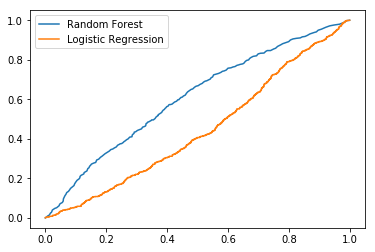

In [10]:
rf_pred = rf.predict_proba(X_test)[:, 1]
lr_pred = lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr_rf, tpr_rf, label='Random Forest');
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression');
plt.legend();

__ё)__ Попробуйте подобрать для логистической регрессии сулу регуляризации `C` по решётке. Какое значение параметра оказалось самым лучшим? Найдите для самого хорошего алгоритма площадь под ROC-кривой на тестовой выборке. Удалось ли побить случайный лес?  

In [22]:
lr_1 = LogisticRegression(penalty = 'l1', C = 0.01).fit(X_train, y_train)
lr_pred_1 = lr_1.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, lr_pred_1)

0.61704358895876232

In [24]:
max_ra = 0
for c in [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 15, 20, 50, 100, 200]:
    lr_1 = LogisticRegression(penalty = 'l1', C = c).fit(X_train, y_train)
    lr_pred_1 = lr_1.predict_proba(X_test)[:, 1]
    if roc_auc_score(y_test, lr_pred_1)>max_ra:
        max_ra = roc_auc_score(y_test, lr_pred_1)
        best_c = c
print(best_c, max_ra)

200 0.641376293895


In [25]:
lr_1 = LogisticRegression(penalty = 'l1', C = best_c).fit(X_train, y_train)
lr_pred_1 = lr_1.predict_proba(X_test)[:, 1]

In [26]:
fpr_lr2, tpr_lr2, _ = roc_curve(y_test, lr_pred_1)

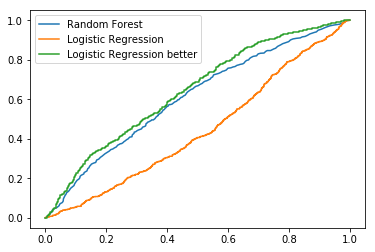

In [27]:
plt.plot(fpr_rf, tpr_rf, label='Random Forest');
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression');
plt.plot(fpr_lr2, tpr_lr2, label='Logistic Regression better');
plt.legend();

вроде удалось

__з)__ Своими словами опишите зачем обычно выборку разбивают на тренировочную и тестовую. Объясните что такое кросс-валидация и зачем её придумали. 

"А где буква ж?" - спросите вы. Если бы мы выбросили букву ё, никто бы не спросил. А ей, между прочим, тоже обидно!

## Expecto Patronum 3 [40 баллов] (соскучились по мне?)

На страничке https://www.hse.ru/org/persons/ находится информация про сотрудников Вышки. Ваша задача спарсить её. Выберите свою любимую букву алфавита (конечно же такую, что на неё есть сотрудники на сайте). Напишите код, который соберёт все фамилии и имена преподавателей, а потом сохранит эту информацию в табличку формата `.csv`.

### [бонусные 20 баллов] 

Собери всех сотрудников вышке с ФИО, телефонами, должностями и информацией с личных страниц (оброзавание, достижения и тп).

In [ ]:
# :) 